In [4]:
from utils.postprocessing import *
from utils.visualisation import *

ValueError: attempted relative import beyond top-level package

In [2]:
from tf.transformations import *
from tf import transformations
import numpy as np
import tf
import glob


# Postprocessing
Let's start by importing the simulation runned in the flat ground and visualise some trace

In [2]:
BAG_FOLDER = '/home/francesco/Desktop/carino/vaevictis/data/'

In [40]:
flat = glob.glob(BAG_FOLDER + '/flat/**.bag')
bars1 = glob.glob(BAG_FOLDER + '/bars1/**.bag')

files = [*flat, *bars1]

In [41]:
data = files2dfs(files)

In [25]:
%matplotlib notebook

In [44]:
def get_map2dfs(data):
    d = {k : [] for k, _ in data}
    [d[k].append(v) for k,v in data]
    
    return d

In [45]:
map2dfs = get_map2dfs(data)

In [49]:
df = map2dfs['flat'][0]

<IPython.core.display.Javascript object>


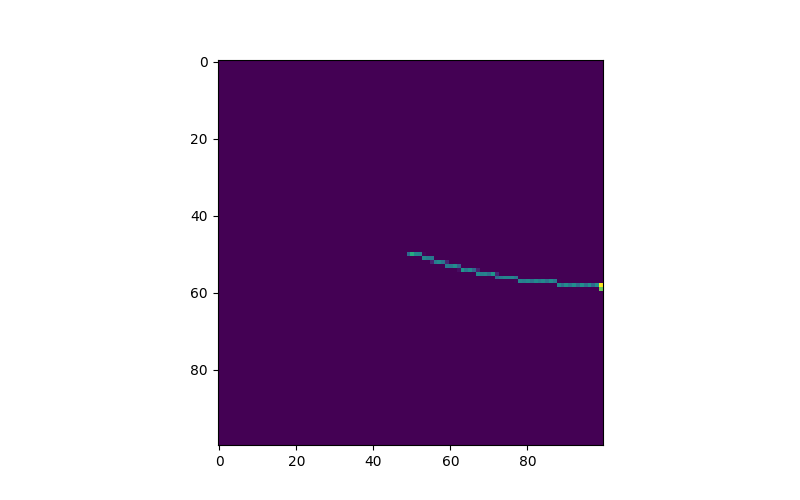

In [51]:
world, X, Y = create_trace_world(df)
create2dtrace(world)

<IPython.core.display.Javascript object>


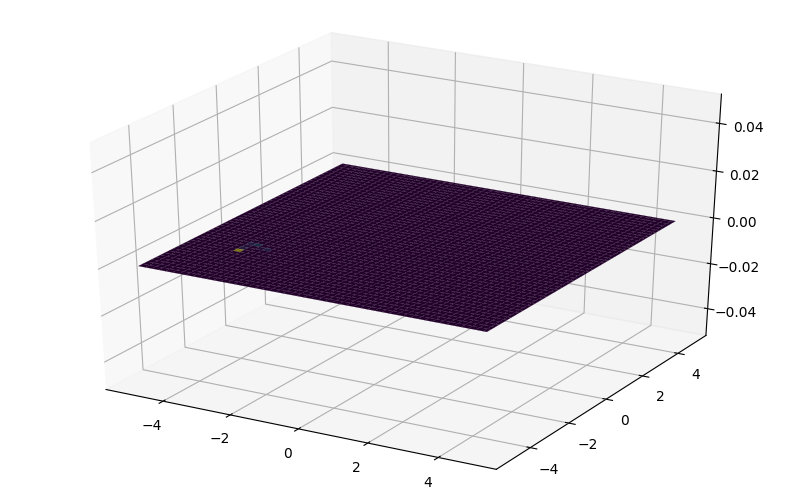

In [50]:
create3dtrace(world, X, Y, 'flat')

## Features
We have to first find out median distance for each step

In [29]:
def get_np_poses_df(df):
    x = df.pose__pose_position_x
    y = df.pose__pose_position_y
    z = df.pose__pose_position_z
    
    positions = np.column_stack([x, y, z])
    
    
    x = df.pose__pose_orientation_x
    y = df.pose__pose_orientation_y
    z = df.pose__pose_orientation_z
    w = df.pose__pose_orientation_w
    
    orientations = np.column_stack([x, y, z, w])

    
    return np.column_stack([positions, orientations])

In [52]:
def get_diff(poses, time_steps):
    poses1 = poses
    poses2 = np.roll(poses, -time_steps, axis=0)
    diff = poses1 - poses2

    diff = diff[:len(diff) - time_steps]
    
    return diff

In [53]:
def make_diff_pos_plot(diff):
    for idx in range(diff.shape[1]):
        fig = plt.figure()
        plt.plot(np.arange(diff.shape[0]), diff[:,idx])
        plt.legend(str(idx))
        plt.show()
        
    return diff

<IPython.core.display.Javascript object>


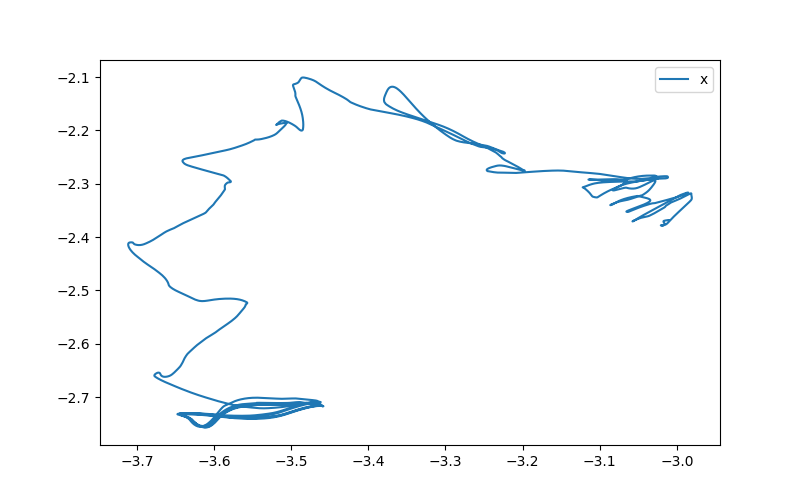

In [33]:
fig = plt.figure()
plt.plot( poses[:,0], poses[:,1])
plt.legend(str('x'))
plt.show()

In [57]:
df = map2dfs['flat'][0]
poses_flat = get_np_poses_df(df)
diff_flat = get_diff(poses_flat, 1)

In [59]:
df = map2dfs['bars1'][0]
poses_bars1 = get_np_poses_df(df)
diff_bars1 = get_diff(poses_bars1, 1)

In [64]:
lenght = min(diff_bars1.shape[0], diff_flat.shape[0])

<IPython.core.display.Javascript object>


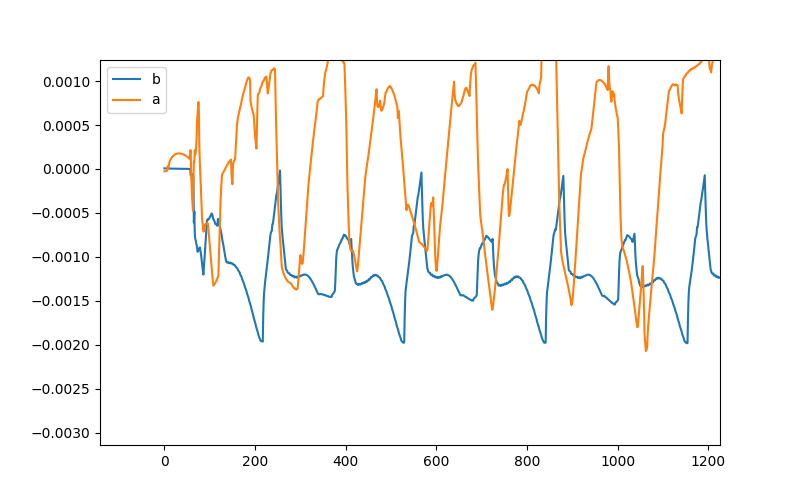

In [69]:
fig = plt.figure()
plt.plot( np.arange(lenght), diff_flat[:lenght,0])
plt.legend(str('flat'))

plt.plot( np.arange(lenght), diff_bars1[:lenght,0])
plt.legend(str('bars'))
plt.show()

In [55]:
diff.mean(axis=1)

array([ 4.62670608e-05,  6.86065040e-05,  9.09517235e-05, ...,
       -7.06301754e-04, -6.83076931e-04, -6.59979851e-04])

<IPython.core.display.Javascript object>


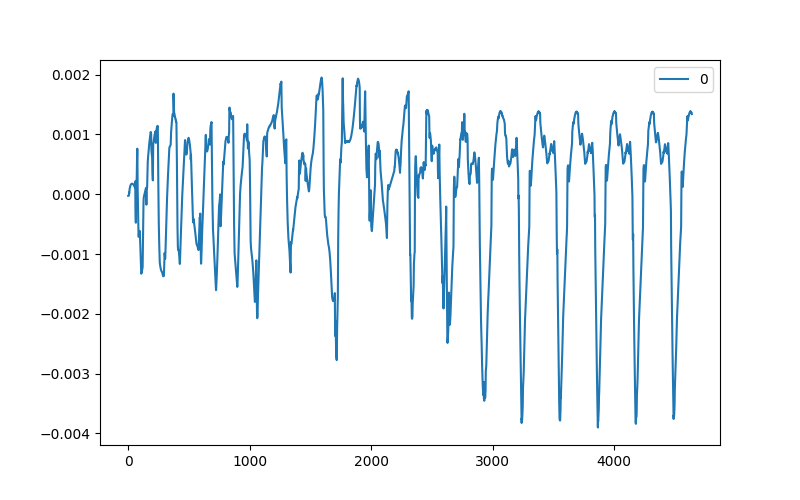

<IPython.core.display.Javascript object>


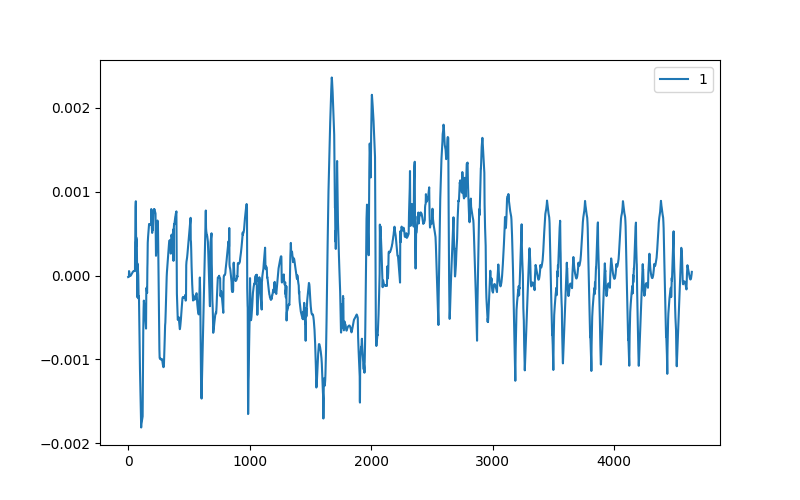

<IPython.core.display.Javascript object>


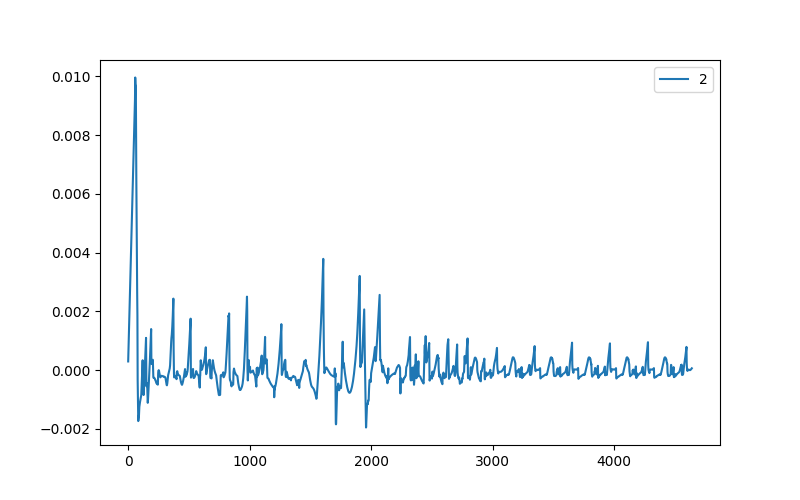

<IPython.core.display.Javascript object>


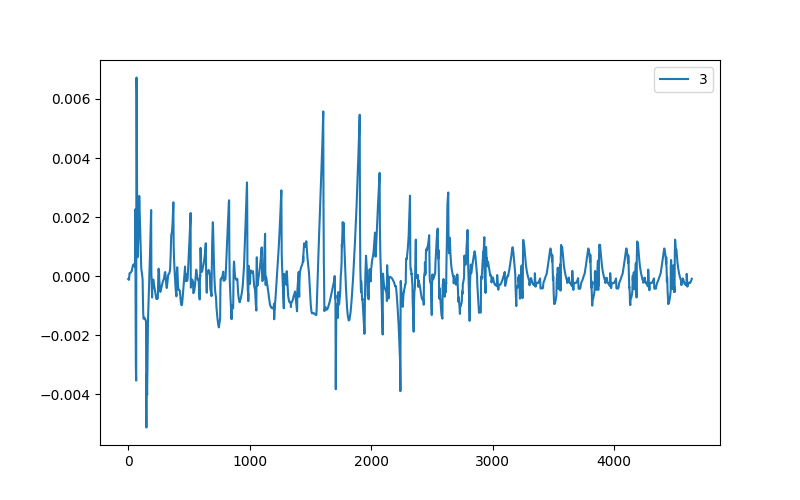

<IPython.core.display.Javascript object>


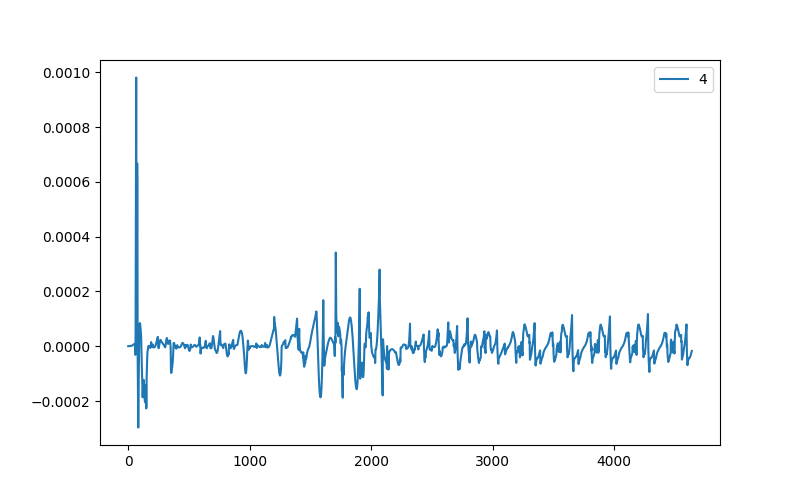

<IPython.core.display.Javascript object>


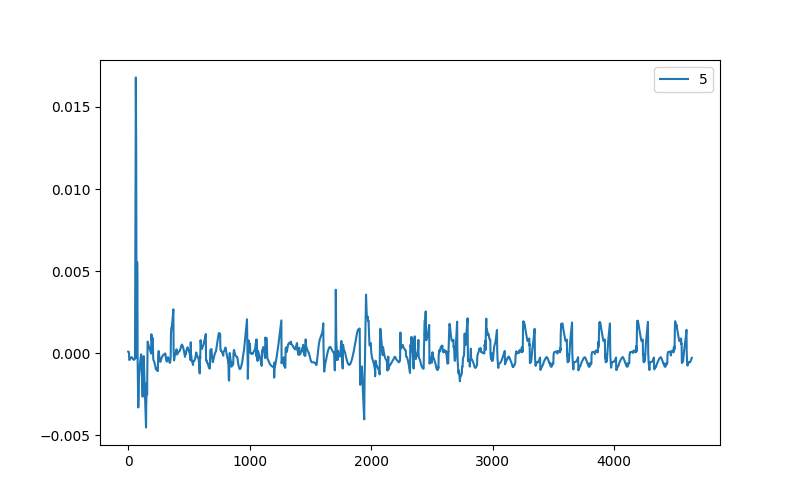

<IPython.core.display.Javascript object>


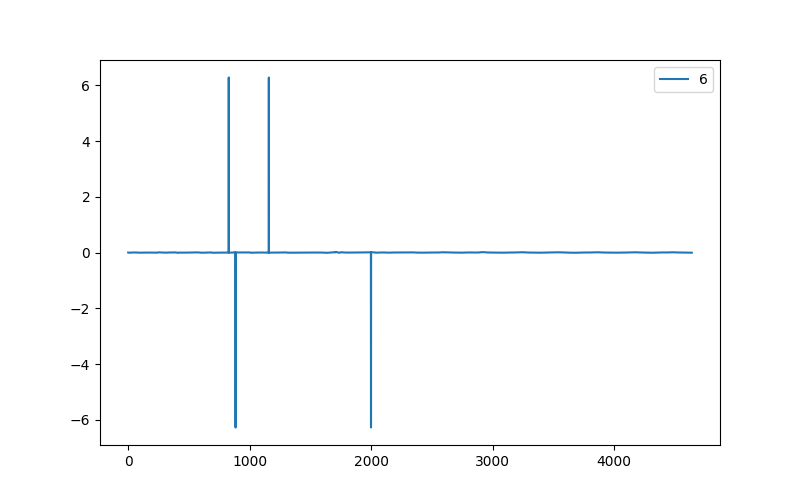

In [34]:
diff = make_diff_pos_plot(1)

In [35]:
diff.mean(axis=1)

array([ 4.62670608e-05,  6.86065040e-05,  9.09517235e-05, ...,
       -7.06301754e-04, -6.83076931e-04, -6.59979851e-04])

In [38]:
4.62670608e-05 > 0.00017

False

In [98]:
x, x_ = poses[0][0], poses[0][3]
x1, x1_ = poses[1][0], poses[1][3]

In [100]:
np.array([x, x_]) - np.array([x1, x1_])

array([7.24177059e-06, 4.83601869e-04])

In [79]:
np.std(positions, axis=0)

array([0.72412042, 1.64612546, 0.03393825])

In [80]:
def get_median(df):
    x = df.pose__pose_position_x
    y = df.pose__pose_position_y
    z = df.pose__pose_position_z

In [ ]:
for bag in files2bags(files):
    for topic, msg, t in bag.read_messages():
        print(topic, msg, t)